In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table
from scipy.spatial import distance
from scipy import spatial
from scipy.spatial import KDTree
import time

In [17]:
T = Table.read('NGC2264.vot',format='votable')
print(T.colnames)

RA2 = T['RA_ICRS']
DEC2 = T['DE_ICRS']
print(len(RA2))

['_RAJ2000', '_DEJ2000', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RADEcor', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']
31999


In [5]:
t = Table.read('CHAM_data.vot',format='votable')
print(t.colnames)

RA = t['RA_ICRS']
DEC = t['DE_ICRS']
print(len(RA))

['_RAJ2000', '_DEJ2000', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RADEcor', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']
15281


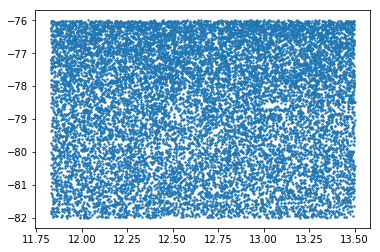

In [19]:
from scipy import spatial
from scipy.spatial import KDTree
import numpy as np
import copy
import time

plt.scatter(RA,DEC,s=2.0)
plt.show()

Input Data for Distance Map/Contour Plot creation

In [145]:
#data = np.array([RA,DEC])
data = np.array([RA2,DEC2])
data = np.transpose(data)
print(data[0])
#print(data[30000])

[ 99.70000758   9.12675512]


In [79]:
def KDneighbor(array):
    tree = KDTree(array,100000)
    dist, ind = tree.query(array, k=7)
    return(dist[5])

Length of dist 10
LENGTH OF DISTARRAY: 40000

Length of distArray: 40000
[ 0.01755462  0.01310946  0.01474173  0.01556242  0.01515134]


RunTime: 7.79555082321167 s

Runtime to build XYcoords: 0.0 s

Runtime to build KDTree: 7.7635111808776855 s


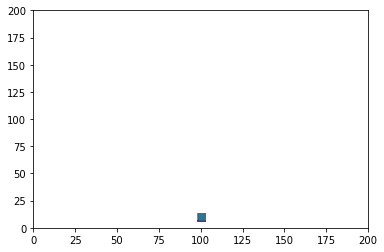

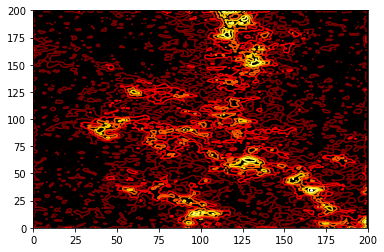

In [146]:
from matplotlib.pyplot import *
Start = time.time()

N = 200
xgrid = np.linspace(np.min(data[:,0]),np.max(data[:,0]),N)
ygrid = np.linspace(np.min(data[:,1]),np.max(data[:,1]),N)
X, Y = np.meshgrid(xgrid,ygrid)

X = np.array(X)
Y = np.array(Y)

time1 = time.time()

XY = [X,Y]
XY = np.transpose(XY)
XYcoords = XY[0]
for j in range(1,len(XY)):
    XYcoords = np.vstack((XYcoords,XY[j]))


start1 = time.time()

end1 = time.time()
start2 = time.time()
tree = KDTree(data,50)
dist,ind = tree.query(XYcoords,k=10)
end2 = time.time()
print('Length of dist',len(dist[0]))

distArray = []
for d in range(len(dist)):
    distArray.append(dist[d][5])
print('LENGTH OF DISTARRAY:',len(distArray))
print('\nLength of distArray:',len(distArray))    
distArray = np.array(distArray)
print(distArray[0:5])

End = time.time()

print('\n\nRunTime:',End-Start,'s')
print('\nRuntime to build XYcoords:',end1-start1,'s')
print('\nRuntime to build KDTree:',end2-start2,'s')


distArray = np.reshape(distArray,(-1,N))
distArray = np.transpose(distArray)

plt.scatter(XYcoords[:,0],XYcoords[:,1],marker='s',c=distArray)
plt.xlim(0,N)
plt.ylim(0,N)
plt.show()
fig, ax = plt.subplots()
ax.set_facecolor('black')
plt.scatter(data[:,0],data[:,1],s=3.0,c='y')
#plt.scatter(test_array[:,0]*N,test_array[:,1]*N,marker='s',c=distArray,cmap="gray")
plt.contour(distArray,6,cmap='hot')
plt.xlim(0,N)
plt.ylim(0,N)

plt.show()


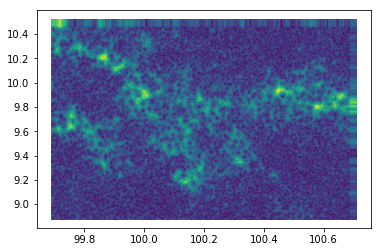

In [116]:
#XYcoords = np.transpose(XYcoords)
plt.scatter(XYcoords[:,0],XYcoords[:,1],marker='s',c=distArray)
plt.show()

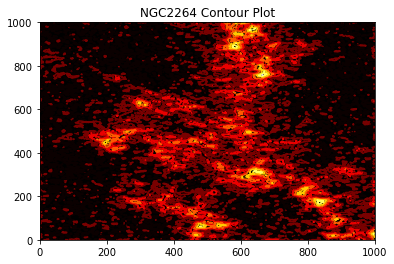

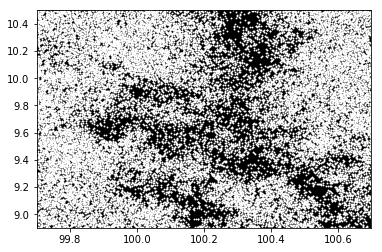

In [152]:
from scipy import ndimage

#distances = copy.copy(distArray)
#distances = np.transpose(distances)
fig, ax = plt.subplots()
ax.set_facecolor('black')
plt.contour(distances,cmap='hot')
plt.title('NGC2264 Contour Plot')
plt.show()
fig, ax = plt.subplots()
ax.set_facecolor('black')
plt.scatter(RA2,DEC2,s=0.7,c='w')
plt.xlim(np.min(RA2),np.max(RA2))
plt.ylim(np.min(DEC2),np.max(DEC2))
plt.show()

In [131]:
t = time.time()
Z = np.random.rand(30000,2)
V = np.random.rand(62500,2)
tree = KDTree(Z,50)
dist,ind = tree.query(V,k=50)
e = time.time()
print('\nRuntime:',e-t)
#print(dist)


Runtime: 23.19644570350647
